In [9]:
import numpy as np
import csv
import matplotlib.pyplot as plt

In [10]:
# Initialize lists to hold the data
user_ids = []
movie_ids = []
ratings = []

# Load data from CSV file
#with open('./ml-latest-small/ratings.csv', encoding='utf-8') as file:
with open('./ml-25m/ratings.csv', encoding='utf-8') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)  # Skip the header row
    for row in csv_reader:
        user_id = int(row[0]) #- 1  # Adjust for zero-based indexing
        movie_id = int(row[1]) #- 1  # Adjust for zero-based indexing
        rating = float(row[2])

        user_ids.append(user_id)
        movie_ids.append(movie_id)
        ratings.append(rating)

# Convert lists to numpy arrays
user_ids = np.array(user_ids)
movie_ids = np.array(movie_ids)
ratings = np.array(ratings)


In [11]:
print("Number of entries in the sparse matrix:", len(ratings))

Number of entries in the sparse matrix: 25000095


# Plot rating distributions of data

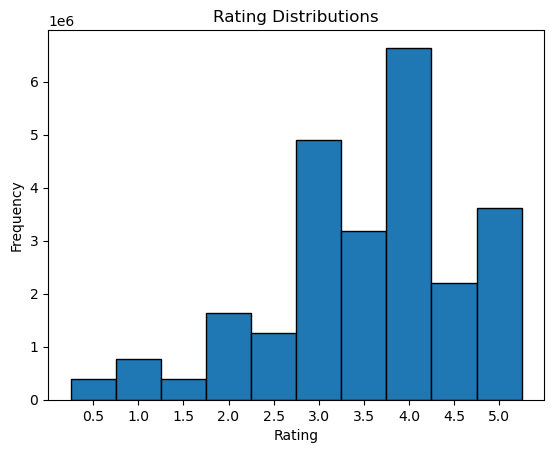

In [12]:

# Define bins such that each rating is centered in the bar.
bins = [0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25]
plt.hist(ratings, bins=bins, edgecolor='black', align='mid')
plt.title('Rating Distributions')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks([0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.show()

## Are there power laws in the data? Is it scale-free? (Note that each user rated at least 20 movies. Truncation will skew the power law that you'd expect...)

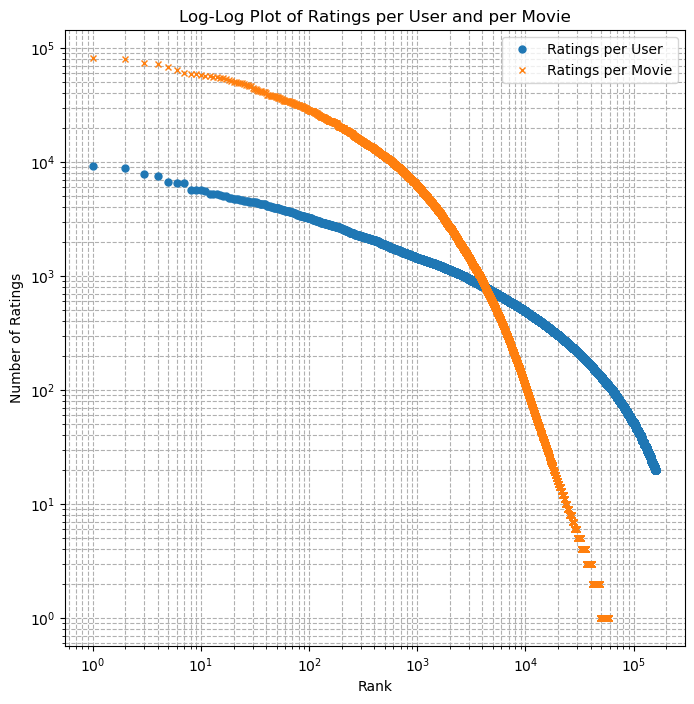

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Count ratings per user
unique_users, user_counts = np.unique(user_ids, return_counts=True)
# Count ratings per movie
unique_movies, movie_counts = np.unique(movie_ids, return_counts=True)

# Sort counts in descending order
user_counts_sorted = np.sort(user_counts)[::-1]
movie_counts_sorted = np.sort(movie_counts)[::-1]

# Plotting
plt.figure(figsize=(8, 8))
plt.loglog(user_counts_sorted, marker='o', linestyle='None', label='Ratings per User', markersize=5)
plt.loglog(movie_counts_sorted, marker='x', linestyle='None', label='Ratings per Movie', markersize=5)
plt.title('Log-Log Plot of Ratings per User and per Movie')
plt.xlabel('Rank')
plt.ylabel('Number of Ratings')
plt.legend()
plt.grid(True, which="both", ls="--")  # Adding a grid for better readability
plt.show()
